# Fake News Detector

**Building a system to identify unreliable news articles.**

Contributers:
- Abdullah Almokainzi
- Hotaf Aljuhani
- Arwa Ashi

In [1]:
# Make necessary imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

## Data Cleaning

In [2]:
# Read the data
df = pd.read_csv('../data/kaggle_fake_news_data.csv')

In [3]:
# Rows and columns in the data
df.shape

(20800, 5)

In [4]:
# Take a glimpse of the data
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# Get more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
# Check for missing data in each feature/column
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
# Drop unrelated features first, then drop missing data
df = df.drop(columns=['title', 'author']).dropna()

In [8]:
# Double check missing data
df.isna().sum()

id       0
text     0
label    0
dtype: int64

In [9]:
# Get the labels. 1: unreliable, 0: reliable
labels = df.label
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## Model Building

In [10]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], labels, test_size = 0.2, random_state = 7)

In [11]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [12]:
pipe = Pipeline(steps = [('clf', PassiveAggressiveClassifier())])
                         
search_space = [{'clf': [PassiveAggressiveClassifier()]},
                {'clf': [MultinomialNB()]},
                {'clf': [BernoulliNB()]},
                {'clf': [RidgeClassifier()]},
                {'clf': [SGDClassifier()]},
                {'clf': [Perceptron()]},
                {'clf': [RandomForestClassifier()]}]
                         
gridsearch = GridSearchCV(estimator  = pipe,
                          param_grid = search_space,
                          scoring    = 'accuracy')
                         
best_model = gridsearch.fit(tfidf_train, y_train)

In [13]:
# Print best model accuracy score
print('Best accuracy: %f using %s'%(best_model.best_score_, best_model.best_params_))

Best accuracy: 0.960501 using {'clf': PassiveAggressiveClassifier()}


## Model Validation

In [14]:
# Predict on the test set and calculate accuracy
y_pred = gridsearch.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 96.03%


In [15]:
# Build confusion matrix. 1: unreliable, 0: reliable
confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[2035,   91],
       [  74, 1953]])

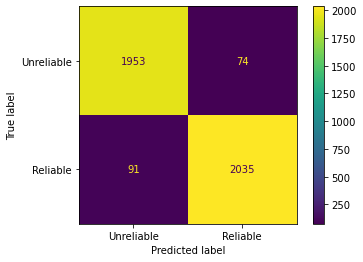

In [16]:
# Plot confusion matrix. 1: unreliable, 0: reliable
plot_confusion_matrix(gridsearch, tfidf_test, y_test, display_labels=['Unreliable', 'Reliable'])